In [1]:
selected = (2, 1)
images_dir = "previews"
images_matrix = [
    ["square-how_to_draw_curve", "square-new_zealand_dem_remake", "square-geopandas_kotlin_isl", "square-mosaic_image"],
    ["square-spb_bakeries", "square-world_happiness", "square-palmer_penguins", "square-plotting_airbnb_prices_boston"],
    ["square-mandelbulbs", "square-ivindo_river", "square-titanic", "square-japanese_volcanoes_on_map"],
]

In [2]:
class GalleryPreview:
    from PIL import Image

    _preview = None
    _selected = None
    _width = None
    _height = None
    _max_width = None
    _max_height = None
    _dwidth = None
    _dheight = None

    def __init__(self, images_matrix, images_dir, *, selected=(0, 0), scale=1.2, width=None, height=None):
        import os
        self._selected = selected
        self._width = width or height
        self._height = height or width
        for (i, images_row) in enumerate(images_matrix):
            for (j, image_name) in enumerate(images_row):
                image = self.Image.open(os.path.join(images_dir, "{0}.png".format(image_name)))
                self._initialize_vars(image, len(images_matrix), len(images_row), scale)
                self._paste_image(image, i, j)
        selected_image_name = images_matrix[self._selected[0]][self._selected[1]]
        selected_image = self.Image.open(os.path.join(images_dir, "{0}.png".format(selected_image_name)))
        self._paste_selected_image(selected_image)

    def draw(self):
        return self._preview

    def show(self):
        self._preview.show()

    def save(self, filename="gallery.png"):
        self._preview.save(filename)

    def _initialize_vars(self, image, rows_count, cols_count, scale):
        if self._preview is not None:
            return
        if self._width is None or self._height is None:
            self._max_width, self._max_height = image.size
            self._width, self._height = int(self._max_width / scale), int(self._max_height / scale)
        else:
            self._max_width, self._max_height = int(scale * self._width), int(scale * self._height)
        self._dwidth, self._dheight = int((self._max_width - self._width) / 2), int((self._max_height - self._height) / 2)
        total_width = cols_count * self._width
        if self._selected[1] == 0 or self._selected[1] == cols_count - 1:
            total_width += self._dwidth
        total_height = rows_count * self._height
        if self._selected[0] == 0 or self._selected[0] == rows_count - 1:
            total_height += self._dheight
        self._preview = self.Image.new("RGBA", (total_width, total_height))

    def _paste_image(self, image, i, j):
        if i == self._selected[0] and j == self._selected[1]:
            return
        self._preview.paste(image.resize((self._width, self._height)), self._get_left_top(i, j))

    def _paste_selected_image(self, image):
        button_image = self.Image.open("button.png")
        image.paste(button_image, (int((image.size[0] - button_image.size[0]) / 2), int((image.size[1] - button_image.size[1]) / 2)), mask=button_image)
        self._preview.paste(image.resize((self._max_width, self._max_height)), self._get_left_top(self._selected[0], self._selected[1], -self._dwidth, -self._dheight))

    def _get_left_top(self, i, j, dleft=0, dtop=0):
        left = j * self._width + dleft
        top = i * self._height + dtop
        if self._selected[1] == 0:
            left += self._dwidth
        if self._selected[0] == 0:
            top += self._dheight
        return left, top

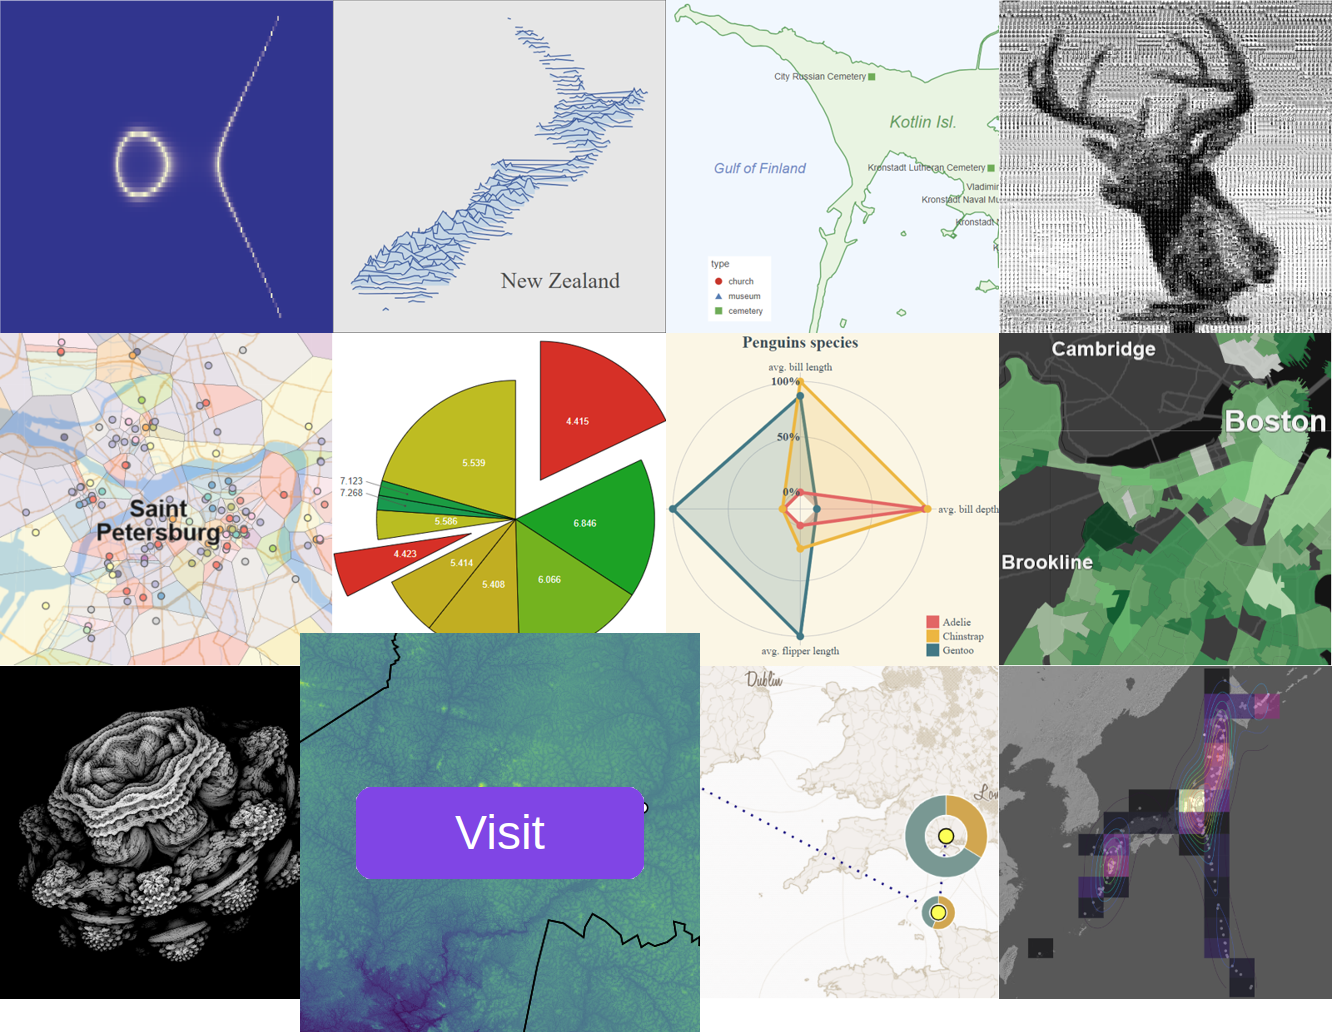

In [3]:
gallery_preview = GalleryPreview(images_matrix, images_dir, selected=selected)
gallery_preview.draw()

In [4]:
gallery_preview.save()